<a href="https://colab.research.google.com/github/dgatti/PortfolioBigData/blob/main/Pruebas_b%C3%A1sicas_de_Text_Mining.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import svm, datasets, tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

## **Prueba de funciones sueltas de NLTK**

In [2]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords #Libreria que permite dar tratamiento a palabras que aparecen en un texto de manera frecuente pero que no aportan informaciòn

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [4]:
SW=stopwords.words("spanish") #Entre esas palsabras que no aportan informaciòn estàn las stop words. Las recupero en una variable
print(SW)

In [6]:
from nltk.stem import SnowballStemmer

In [7]:
stemer=SnowballStemmer("spanish")
stemer.stem("comunicado") #acà lo que se hace es buscar para una palabra en spanish la palabra base o raíz de lo que son palabras parecidas y que no van a tiener relevancia.
#Por ejemplo la base de comunicado, comunica, comunicar, comunicaciòn.....

'comunic'

In [ ]:
nltk.download('book')

In [ ]:
from nltk.book import *

In [ ]:
text1.concordance("night") #Dentro del texto en text1 busca la palabra night para saber por ejemplo cuantas veces se repite

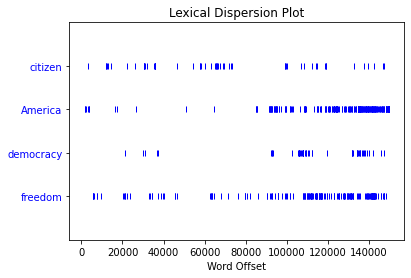

In [17]:
text4.dispersion_plot(["citizen", "America", "democracy", "freedom"]) #Se grafica la disperciòn de las palabras en el array dentro de text4

In [24]:
#Buscamos las palabras que tienen mayor significancia dentro del texto o palabras màs representativas. Ayuda a reconocer autores de libros por su estilo de escritura
Significancia=FreqDist(text1) #para todas las palabras de text1 recupera las que tienen mayor significacnia y retorna una array de frecuencia
Significancia["body"] #Cuantas veces aparece la palabra Body. Obtenemos el dato del array generado

110

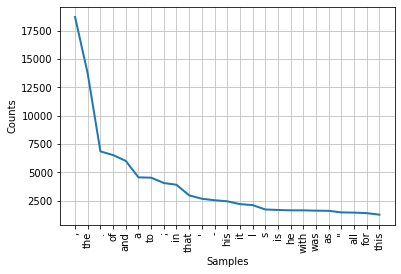

In [25]:
Significancia.plot(25) #grafico con las 25 palabras que màs se repiten. Se observa que son todas stopwords (the, and, ok, a, to....). No representan muy bien al texto. Si las eliminamos?

In [26]:
SW=stopwords.words("english")

In [28]:
Texto_Filtrado=[palabra for palabra in text1 if palabra not in SW]

In [30]:
len(text1)-len(Texto_Filtrado) #elimina 99 mil palabras que no significan nada

99541

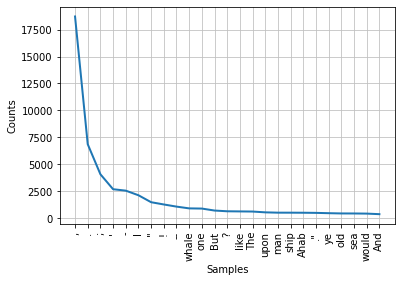

In [31]:
Significancia_Filtrada=FreqDist(Texto_Filtrado)
Significancia_Filtrada.plot(25) #si bien ahora habrìa que eliminar los signos de puntuaciòn, ya se observa que son otras las palabras que màs se repiten, palabras útilis para el análisis

## **Jugamos con el armado de listas y graficamos frecuencia de ocurrencia de palabras en un set de datos de reseñas de pelìculas**

In [32]:
from nltk.corpus import movie_reviews #importa un set de datos que posee textos con reseñas negativas y positivas de una pelicula

In [34]:
len(movie_reviews.fileids()) #ID asociados a cada reseña (neg y pos) y la cantidad de reseñas

2000

In [35]:
reseña_negativa=movie_reviews.fileids("neg")
reseña_positiva=movie_reviews.fileids("pos")
#genera listas con las reseñas negativas y otra con las positivas

In [38]:
movie_reviews.words(fileids=reseña_negativa[0]) #es una forma de tokenizar un texto, usando la funciòn words, arma una lista con las palabras que lo componene, separando palabra por palabra

['plot', ':', 'two', 'teen', 'couples', 'go', 'to', ...]

In [39]:
nltk.download("stopwords")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [41]:
import string #libreria tiene una clase llamada puntuation. Lista de caracteres con los signos de puntuacion
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [42]:
palabras_inutiles=stopwords.words("english")+list(string.punctuation) #arma una lista unica que contiene las stopwords en ingles y los signos de puntuacion. para luego usar esta lista para eliminar estos elementos que no aportan informacion en la reseña

In [44]:
palabras_filtradas=[] #inicialista un array vacio
for palabra in movie_reviews.words():
  if palabra not in palabras_inutiles:
    palabras_filtradas.append(palabra) #genera un array con las palabras del texto/reseñas, tokenizando con .words, que contiene las palabras que son utiles para el analisis. Cada registro del array es una palabra

In [ ]:
len(palabras_filtradas)

In [46]:
from collections import Counter #para hacer conteo y ordenamiento de frecuencias de las palabras

In [52]:
contador_palabras=Counter(palabras_filtradas) #crea una lista donde cada registro es la cantidad de veces que se repite cada palabra dentro del array

In [50]:
palabras_comunes=contador_palabras.most_common()[:10] #muestra las 10 palabras que mas se repiten o las màs comunes
print(palabras_comunes)

[('film', 9517), ('one', 5852), ('movie', 5771), ('like', 3690), ('even', 2565), ('good', 2411), ('time', 2411), ('story', 2169), ('would', 2109), ('much', 2049)]


In [53]:
%matplotlib inline

In [54]:
contador_palabras_ordenado=sorted(list(contador_palabras.values()),reverse=True) #ordena de mayor a menor la lista

Text(0, 0.5, 'orden de las palabras')

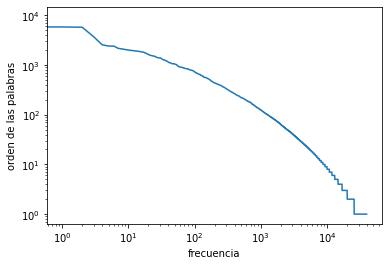

In [55]:
plt.loglog(contador_palabras_ordenado) #se grafica en escala logarìtmica para permitir analisar bien el dato ya que en escala decimal, al ser tanta cantidad de datos, es dificil apreciar el grafico y la informacion
plt.xlabel('frecuencia')
plt.ylabel('orden de las palabras') #grafica la frecuencia de ocurrencia de las palabras

(array([3.9408e+04, 1.2300e+02, 2.9000e+01, 1.2000e+01, 8.0000e+00,
        3.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 2.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00]),
 array([1.0000e+00, 4.7680e+02, 9.5260e+02, 1.4284e+03, 1.9042e+03,
        2.3800e+03, 2.8558e+03, 3.3316e+03, 3.8074e+03, 4.2832e+03,
        4.7590e+03, 5.2348e+03, 5.7106e+03, 6.1864e+03, 6.6622e+03,
        7.1380e+03, 7.6138e+03, 8.0896e+03, 8.5654e+03, 9.0412e+03,
        9.5170e+03]),
 <a list of 20 Patch objects>)

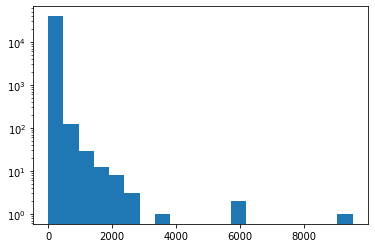

In [56]:
plt.hist(contador_palabras_ordenado, bins=20, log=True) #lo muestra como histograma, tambien en escala logaritmica

### **Análisis de "sentimientos" de un set de datos de reseñas de una película**

**Extraemos y transformamos los datos**

In [61]:
def bolsa_palabras(palabras):  #se crea una funciòn que crea un diccionario de palabras, diccionario porque a difrencia de la lista no guarda elementos repetidos
  diccionario={}
  for palabra in palabras:
     if palabra not in palabras_inutiles:
       diccionario[palabra]=1
  return diccionario

In [62]:
rasgos_negativos=[]
for f in reseña_negativa:
  rasgos_negativos.append((bolsa_palabras(movie_reviews.words(fileids=[f])), "neg")) #usa la funciona anterior para aplicar la creacion del diccionario a las reseñas negaticvas de las peliculas y le agrega una etiqueta "neg"

In [63]:
print(rasgos_negativos[0])

({'plot': 1, 'two': 1, 'teen': 1, 'couples': 1, 'go': 1, 'church': 1, 'party': 1, 'drink': 1, 'drive': 1, 'get': 1, 'accident': 1, 'one': 1, 'guys': 1, 'dies': 1, 'girlfriend': 1, 'continues': 1, 'see': 1, 'life': 1, 'nightmares': 1, 'deal': 1, 'watch': 1, 'movie': 1, 'sorta': 1, 'find': 1, 'critique': 1, 'mind': 1, 'fuck': 1, 'generation': 1, 'touches': 1, 'cool': 1, 'idea': 1, 'presents': 1, 'bad': 1, 'package': 1, 'makes': 1, 'review': 1, 'even': 1, 'harder': 1, 'write': 1, 'since': 1, 'generally': 1, 'applaud': 1, 'films': 1, 'attempt': 1, 'break': 1, 'mold': 1, 'mess': 1, 'head': 1, 'lost': 1, 'highway': 1, 'memento': 1, 'good': 1, 'ways': 1, 'making': 1, 'types': 1, 'folks': 1, 'snag': 1, 'correctly': 1, 'seem': 1, 'taken': 1, 'pretty': 1, 'neat': 1, 'concept': 1, 'executed': 1, 'terribly': 1, 'problems': 1, 'well': 1, 'main': 1, 'problem': 1, 'simply': 1, 'jumbled': 1, 'starts': 1, 'normal': 1, 'downshifts': 1, 'fantasy': 1, 'world': 1, 'audience': 1, 'member': 1, 'going': 1, 'd

In [66]:
rasgos_positivos=[]
for f in reseña_positiva:
  rasgos_positivos.append((bolsa_palabras(movie_reviews.words(fileids=[f])), "pos"))

In [67]:
print(rasgos_positivos[0])

({'films': 1, 'adapted': 1, 'comic': 1, 'books': 1, 'plenty': 1, 'success': 1, 'whether': 1, 'superheroes': 1, 'batman': 1, 'superman': 1, 'spawn': 1, 'geared': 1, 'toward': 1, 'kids': 1, 'casper': 1, 'arthouse': 1, 'crowd': 1, 'ghost': 1, 'world': 1, 'never': 1, 'really': 1, 'book': 1, 'like': 1, 'hell': 1, 'starters': 1, 'created': 1, 'alan': 1, 'moore': 1, 'eddie': 1, 'campbell': 1, 'brought': 1, 'medium': 1, 'whole': 1, 'new': 1, 'level': 1, 'mid': 1, '80s': 1, '12': 1, 'part': 1, 'series': 1, 'called': 1, 'watchmen': 1, 'say': 1, 'thoroughly': 1, 'researched': 1, 'subject': 1, 'jack': 1, 'ripper': 1, 'would': 1, 'saying': 1, 'michael': 1, 'jackson': 1, 'starting': 1, 'look': 1, 'little': 1, 'odd': 1, 'graphic': 1, 'novel': 1, '500': 1, 'pages': 1, 'long': 1, 'includes': 1, 'nearly': 1, '30': 1, 'consist': 1, 'nothing': 1, 'footnotes': 1, 'words': 1, 'dismiss': 1, 'film': 1, 'source': 1, 'get': 1, 'past': 1, 'thing': 1, 'might': 1, 'find': 1, 'another': 1, 'stumbling': 1, 'block': 

In [64]:
from nltk import NaiveBayesClassifier #imporamos el clasificaro nvies bayes

**Entrenamos el clasificador, NB este caso, luego de exstraer los datos y transformarlos (sacar las palabras inutiles) [texto del vínculo](https://)**

In [65]:
division=800 #se guarda, de los 1000 revies positivos/negativos, 800 para entrenamiento. y 200 para testearlo

In [68]:
clasificador_sentimientos=NaiveBayesClassifier.train(rasgos_positivos[:division]+rasgos_negativos[:division]) #hacemos el entrenamiento del clasificador

In [69]:
nltk.classify.util.accuracy(clasificador_sentimientos, rasgos_positivos[:division]+rasgos_negativos[:division]) #con accuracy prueba la efectividad, ahora prueba efectividad con el mismo set de datos del entrenamiento

0.980625

In [70]:
nltk.classify.util.accuracy(clasificador_sentimientos, rasgos_positivos[division:]+rasgos_negativos[division:]) #se le ingresan los otros 400 datos, 200 neg y 200 pos, que se guardaron para tst

0.7175

In [71]:
clasificador_sentimientos.show_most_informative_features() #muestra las caracteristicas mas importantes. Comoa traves de probabilidades puede indicar o predecir el dato. Por ejemplo si se incluye la palabra insulting, para el clasificador seguro es una reseña negativa ya que en el entrenamiento aprendio que esa palabra aparece 13 veces en reseñas negativas sobre una en positivas.

Most Informative Features
             outstanding = 1                 pos : neg    =     13.9 : 1.0
               insulting = 1                 neg : pos    =     13.7 : 1.0
              vulnerable = 1                 pos : neg    =     13.0 : 1.0
               ludicrous = 1                 neg : pos    =     12.6 : 1.0
             uninvolving = 1                 neg : pos    =     12.3 : 1.0
              astounding = 1                 pos : neg    =     11.7 : 1.0
                  avoids = 1                 pos : neg    =     11.7 : 1.0
             fascination = 1                 pos : neg    =     11.0 : 1.0
                  darker = 1                 pos : neg    =     10.3 : 1.0
               animators = 1                 pos : neg    =     10.3 : 1.0


In [72]:
from nltk import tokenize #funciòn para tokenizar, simplifanco lo que se uso antes

**Ponems a prueba el clasificador**

In [76]:
texto="the movies was beautiful and vulnerable and avoids"
texto_tokenizado=tokenize.casual_tokenize(texto) #tokeniza el texto
bolsa=bolsa_palabras(texto_tokenizado) #crea el diccionario con las palabras del texto ingresado
print(bolsa)

{'movies': 1, 'beautiful': 1, 'vulnerable': 1, 'avoids': 1}


In [77]:
clasificador_sentimientos.classify(bolsa) #utliza el clasificador que entrenamos antes para identificar si es una reseña negativa o positiva

'pos'